In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [5]:
# Label encoding the output parameter
le = LabelEncoder()
le.fit(df["diagnosis"])
df["diagnosis"] = le.transform(df["diagnosis"])

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Training the model using Naive Bayes Algorithm

In [7]:
x = df.iloc[:, 2:]
y = df["diagnosis"]

In [8]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.3, random_state = 10)

In [10]:
bayes = GaussianNB(priors = None)

In [11]:
bayes.fit(x_train, y_train)

GaussianNB()

In [12]:
pred = bayes.predict(x_test)

In [13]:
print(bayes.score(x_test, y_test))

0.9473684210526315


In [14]:
print(accuracy_score(y_test, pred))

0.9473684210526315


## Model Training using PCA 

In [15]:
pca = PCA(n_components = 2)

In [16]:
pc = pca.fit_transform(x_std)

In [17]:
pdf = pd.DataFrame(data = pc, columns = ["pc1", "pc2"])

In [18]:
pdf.head()

,pc1,pc2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


Text(0, 0.5, 'PC2')

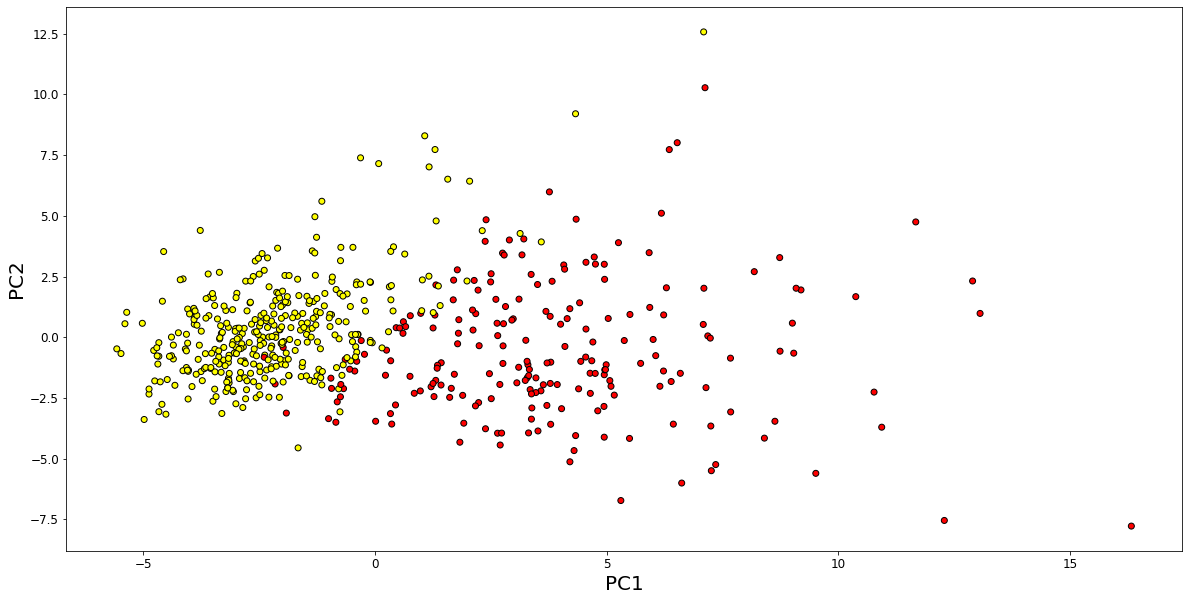

In [19]:
plt.figure(figsize=(20,10))

colour = ['red' if i == 1 else 'yellow' for i in y]
plt.scatter(pdf.pc1,pdf.pc2 ,c=colour,edgecolors='#000000')
plt.ylabel("Glucose",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [20]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier  

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(x_train, y_train) 

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[109,   3],
       [  6,  53]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y_test, y_pred)

0.9473684210526315